## <center><font color=navy>Big Data Economics</font></center>
### <center>Principal Component Analysis (PCA)</center>
#### <center>Ali Habibnia</center>
    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

<div class="alert alert-block alert-info">


Modeling data with many features/variables is challenging, and models built from data that include irrelevant features are often less skillful than models trained from the most relevant data. It is hard to know which features of the data are relevant and which are not. Methods for automatically reducing the number of columns of a dataset are called dimensionality reduction, and perhaps the most popular is method is called the principal component analysis or PCA for short. The core of the PCA method is a matrix factorization (a.k.a Matrix decomposition) method from linear algebra. The eigendecomposition can be used and more robust implementations may use the singular-value decomposition or SVD.


<img src="images/PCA_Plot.gif"  width="550">

> PCA aims to detect the correlation between variables. Convert possible correlated features (predictors) into linearly uncorrelated features (predictors) called principal components. PCA is a method for extracting  latent variables that explain common variance across features.



</div>




### Readings:

1. The Elementss of Statistical Learning, (PCA is covered extensively in ***chapters 3.5, 14.5, and 18.6***)

2. ***Chapter 23,*** Understanding Machine Learning From Theory to Algorithms 

3. Jonathon Shlens, [A Tutorial on Principal Component Analysis](https://arxiv.org/pdf/1404.1100.pdf)

4. Jianqing Fan, Qiang Sun, Wen-Xin Zhou, and Ziwei Zhu, [Principal component analysis for big data](https://arxiv.org/abs/1801.01602)

### Goals

- In real world data analysis tasks we analyze complex data i.e. high-dimensional data. Today is all about Dimension Reduction.

- Dimension reduction (DR) is the task of transforming our data set to one with less features.

- We have a high-dimensional matrix of data X. We’d like to reduce this to a few ‘important’ factors.

- We want to capture the main structure in the data with fewer and more informative features.

- Principal Components Analysis (PCA) is a model-free linear dimension reduction method.

- PCA finds a low-dimensional representation of data that captures as much information as possible.

- PCA, first introduced by Karl Pearson (Pearson,1901), is one of the most commonly used techniques for dimension reduction in many disciplines.

<img src="images/bigp.png"  width="700">

> Feature extraction involves the production of a new set of features from the original features in the data.


### What is principal component analysis?

- A simple way to reduce the dimensionality of the space of variables is to apply some techniques of Matrix Factorization. The mathematical methods of Factorization of Matrices have many applications in a variety of problems related to big data analytics, since the reduction of dimensionality is the essence of cognition.

- PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

- Method:
    - Eigenvalue decomposition of a data covariance (or correlation) matrix
    - Singular value decomposition of a data matrix (After mean centering / normalizing ) the data matrix for each attribute.




### Showcase

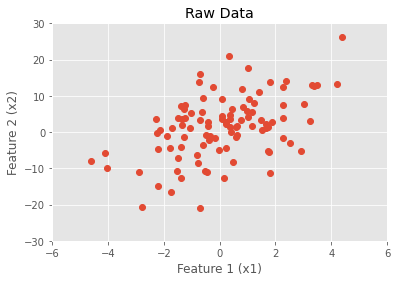

In [3]:
# I generate the data and plot it below.

import numpy as np, matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

np.random.seed(1) #make sure we're all working with the same numbers

X = np.random.normal(0.0,2.0,[100,1])
X = [X,X*2+np.random.normal(0.0,8.0,[100,1])]
X = np.squeeze(X)

plt.plot(X[0],X[1],'o')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Raw Data')
plt.axis([-6,6,-30,30]);

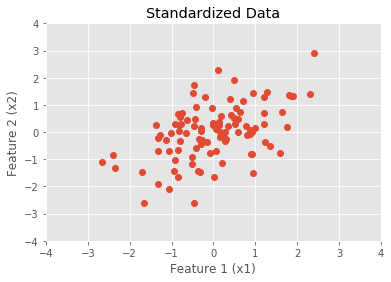

In [5]:
# Below I normalize and plot the data.

import scipy.stats as stats

X = stats.mstats.zscore(X,axis=1)

plt.plot(X[0],X[1],'o')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Standardized Data')
plt.axis([-4,4,-4,4]);

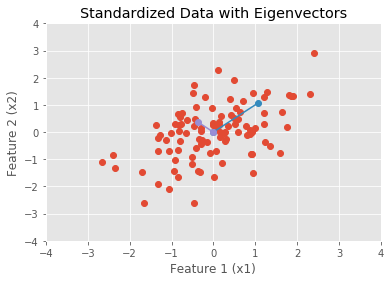

In [6]:
C = np.dot(X,np.transpose(X))/(np.shape(X)[1]-1);
[V,PC] = np.linalg.eig(C)

plt.plot(X[0],X[1],'o')
plt.plot([0,PC[0,0]*V[0]],[0,PC[1,0]*V[0]],'o-')
plt.plot([0,PC[0,1]*V[1]],[0,PC[1,1]*V[1]],'o-')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Standardized Data with Eigenvectors')
plt.axis([-4,4,-4,4]);

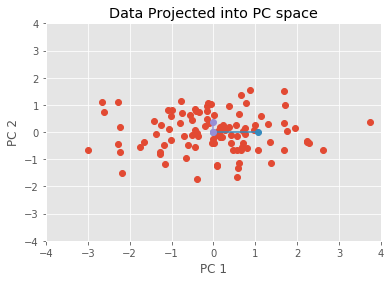

In [7]:
indices = np.argsort(-1*V)
V = V[indices]
PC = PC[indices,:]

X_rotated = np.dot(X.T,PC)

plt.plot(X_rotated.T[0],X_rotated.T[1],'o')
plt.plot([0,PC[1,0]*V[0]],[0,0],'o-')
plt.plot([0,0],[0,PC[1,1]*V[1]],'o-')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Data Projected into PC space')
plt.axis([-4,4,-4,4]);

### Eigendecomposition

Matrix decompositions are methods that reduce a matrix into constituent parts that make it easier to calculate more complex matrix operations. A common analogy for matrix decomposition is the factoring of numbers, such as the factoring of 10 into 2 × 5.

Perhaps the most used type of matrix decomposition is the eigendecomposition that decomposes a (square) matrix into eigenvectors and eigenvalues. This decomposition also plays a role in methods used in machine learning, such as in the Principal Component Analysis method or PCA.

A vector is an eigenvector of a matrix if it satisfies the following equation.
<center>$ A·v=λ·v ~ or ~ Av = λv$</center>

This is called the eigenvalue equation, where $A$ is the parent square matrix that we are decomposing, $\nu$ is the eigenvector of the matrix, and $λ$ is the lowercase Greek letter lambda and represents the eigenvalue scalar.

The parent matrix can be shown to be a product of the eigenvectors and eigenvalues.

<center>$ A = Q · Λ · Q^T$</center>

Where $Q$ is a matrix comprised of the eigenvectors, $Λ$ is the uppercase Greek letter lambda and is the diagonal matrix comprised of the eigenvalues, and $Q^T$ is the transpose of the matrix comprised of the eigenvectors.

Eigenvectors are unit vectors, which means that their length or magnitude is equal to 1.0. They are often referred as right vectors, which simply means a column vector. Eigenvalues are coefficients applied to eigenvectors that give the vectors their length or magnitude.

A matrix that has only positive eigenvalues is referred to as a positive definite matrix, whereas if the eigenvalues are all negative, it is referred to as a negative definite matrix.

In [2]:
# eigendecomposition
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
  [1, 2, 3],
  [4, 5, 6],
   [7, 8, 9]])
print(A)
# factorize
values, vectors = eig(A)
print(values)
print(vectors)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [3]:
# reconstruct matrix
from numpy import diag
from numpy.linalg import inv
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
  [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9]])
print(A)
# factorize
values, vectors = eig(A)
# create matrix from eigenvectors
Q = vectors
# create inverse of eigenvectors matrix
R = inv(Q)
# create diagonal matrix from eigenvalues
L = diag(values)
# reconstruct the original matrix
B = Q.dot(L).dot(R)
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


###  Principal Component Analysis

An important machine learning method for dimensionality reduction is called Principal Component Analysis. It is a method that uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.

It can be thought of as a projection method where data with p-columns (features) is projected into a subspace with p or fewer columns, whilst retaining the essence of the original data.

The first step is to calculate the mean values of each column. Next, we need to center the values in each column by subtracting the mean column value. The next step is to calculate the covariance matrix of the centered matrix. Finally, we calculate the eigendecomposition of the covariance matrix. The eigenvectors can be sorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace. Ideally, we would select $k$ eigenvectors, called principal components, that have the $k$ largest eigenvalues.

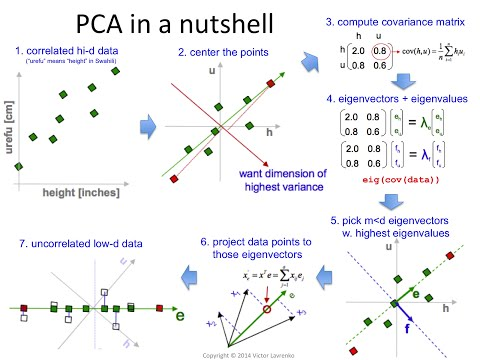

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('QP43Iy-QQWY')

In [5]:
# principal component analysis
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define matrix
A = array([
  [1, 2],
  [3, 4],
[5, 6]])
print(A)
# column means
M = mean(A.T, axis=1)
# center columns by subtracting column means 
C=A-M
# calculate covariance matrix of centered matrix 
V = cov(C.T)
# factorize covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


### Principal Component Analysis in [scikit-learn](http://scikit-learn.org)



In [6]:
# principal component analysis with scikit-learn
from numpy import array
from sklearn.decomposition import PCA
# define matrix
A = array([
  [1, 2],
  [3, 4],
  [5, 6]])
print(A)
# create the transform
pca = PCA(2)
# fit transform
pca.fit(A)
# access values and vectors
print(pca.components_)
print('exp_var', pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
exp_var [8. 0.]
[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


### Singular Value Decomposition

Matrix decomposition, also known as matrix factorization, involves describing a given matrix using its constituent elements. Perhaps the most known and widely used matrix decomposition method is the Singular-Value Decomposition, or SVD. All matrices have an SVD, which makes it more stable than other methods, such as the eigendecomposition. As such, it is often used in a wide array of applications including compressing, denoising, and data reduction.

The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

<center>$ A=U·Σ·V^T$</center>

Where $A$ is the real $n×m$ matrix that we wish to decompose, $U$ is an $m×m$ matrix, $Σ$ represented by the uppercase Greek letter sigma)is an $m×n$ diagonal matrix, and $V^T$ is the $V$ transpose of an $n × n$ matrix where $T$ is a superscript.

The diagonal values in the $Σ$ matrix are known as the singular values of the original matrix $A$. The columns of the $U$ matrix are called the left-singular vectors of $A$, and the columns of $V$ are called the right-singular vectors of $A$. The SVD is calculated via iterative numerical methods. We will not go into the details of these methods. Every rectangular matrix has a singular value decomposition, although the resulting matrices may contain complex numbers and the limitations of floating point arithmetic may cause some matrices to fail to decompose neatly.


- $U$ is the matrix of eigenvectors of $AA^T$
- $Σ$ contains the squareroot of the eigenvalues of $AA^T$
- $V$ is the matrix of eigenvectors of $AA^T$

In this representation the diagonal entries in $Σ$ are the singular values and they are normally ordered with the largest singular value (largest eigenvalue) first. Dimension reduction is achieved by dropping all but k of these singular values.

The SVD is used widely both in the calculation of other matrix operations, such as matrix inverse, but also as a data reduction method in machine learning. SVD can also be used in least squares linear regression, image compression, and denoising data.

#### Calculate Singular-Value Decomposition

The SVD can be calculated by calling the **svd()** function.

In [7]:
# singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([
  [1, 2],
  [3, 4],
  [5, 6]])
print(A)
# factorize
U, s, V = svd(A)
print(U)
print(s)
print(V)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [8]:
# reconstruct rectangular matrix from svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define matrix
A = array([
  [1, 2],
  [3, 4],
  [5, 6]])
print(A)
# factorize
U, s, V = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(V))
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


#### Dimensionality Reduction

A popular application of SVD is for dimensionality reduction. Data with a large number of features, such as more features (columns) than observations (rows) may be reduced to a smaller subset of features that are most relevant to the prediction problem. The result is a matrix with a lower rank that is said to approximate the original matrix. To do this we can perform an SVD operation on the original data and select the top $k$ largest singular values in $Σ$. These columns can be selected from $Σ$ and the rows selected from $V^T$ . An approximate $B$ of the original vector $A$ can then be reconstructed.

<center>$ B=U·Σ_k ·V_k^T$</center>


In [9]:
# data reduction with svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define matrix
A = array([
  [1,2,3,4,5,6,7,8,9,10],
  [11,12,13,14,15,16,17,18,19,20],
  [21,22,23,24,25,26,27,28,29,30]])
print(A)
# factorize
U, s, V = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
V = V[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(V))
print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(V.T)
print(T)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]


In [10]:
# svd data reduction in scikit-learn
from numpy import array
from sklearn.decomposition import TruncatedSVD
# define matrix
A = array([
  [1,2,3,4,5,6,7,8,9,10],
  [11,12,13,14,15,16,17,18,19,20],
  [21,22,23,24,25,26,27,28,29,30]])
print(A)
# create transform
svd = TruncatedSVD(n_components=2)
# fit transform
svd.fit(A)
# apply transform
result = svd.transform(A)
print(result)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


### PCA vs Linear Regression

<img src="images/pcavslr.jpg"  width="600">

> PCA (Perpendicular/orthogonal distance - between x_1 and x_2),
OLS (Vertical distance - between x and y)

### Mathematics of Principal Components

- We start with p-dimensional feature vectors, and want to summarize them by projecting down into a q-dimensional subspace. 

- There are several equivalent ways of deriving the principal components mathematically. The simplest one is by finding the projections which maximize the variance. 

- The first principal component is the direction in feature space along which projections have the largest variance. The second principal component is the direction which maximizes variance among all directions orthogonal to the first. The kth component is the variance-maximizing direction orthogonal to the previous k − 1 components. There are p principal components in all.

- Rather than maximizing variance, it might sound more plausible to look for the projection with the smallest average (mean-squared) distance between the original vectors and their projections on to the principal components; this turns out to be equivalent to maximizing the variance.

- Throughout, assume that the data have been “centered”, so that every feature has mean 0. If we write the centered data in a matrix $X$, where rows are objects and columns are features, then $X^T X = nV$, where $V$ is the covariance matrix of the data.

https://www.stat.cmu.edu/~cshalizi/350/lectures/10/lecture-10.pdf

### Showcase: PCA Image Compression

In [8]:
# IMPORT NECESSARY LIBRARIES

import scipy
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

# IMPORTING IMAGE AND TAKING R,G,B COMPONENTS

a = plt.imread("images/hokie.jpg")
a_np = np.array(a)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def comp_2d(image_2d): # FUNCTION FOR RECONSTRUCTING 2D MATRIX USING PCA
    cov_mat = image_2d - np.mean(image_2d , axis = 1)
    eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat)) # USING "eigh", SO THAT PROPRTIES OF HERMITIAN MATRIX CAN BE USED
    p = np.size(eig_vec, axis =1)
    idx = np.argsort(eig_val)
    idx = idx[::-1]
    eig_vec = eig_vec[:,idx]
    eig_val = eig_val[idx]
    numpc = 60 # THIS IS NUMBER OF PRINCIPAL COMPONENTS, YOU CAN CHANGE IT AND SEE RESULTS
    if numpc <p or numpc >0:
        eig_vec = eig_vec[:, range(numpc)]
    score = np.dot(eig_vec.T, cov_mat)
    recon = np.dot(eig_vec, score) + np.mean(image_2d, axis = 1).T # SOME NORMALIZATION CAN BE USED TO MAKE IMAGE QUALITY BETTER
    recon_img_mat = np.uint8(np.absolute(recon)) # TO CONTROL COMPLEX EIGENVALUES
    return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = comp_2d(a_r), comp_2d(a_g), comp_2d(a_b) # RECONSTRUCTING R,G,B COMPONENTS SEPARATELY
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon)) # COMBINING R.G,B COMPONENTS TO PRODUCE COLOR IMAGE
recon_color_img = Image.fromarray(recon_color_img)
recon_color_img.show()

For more details on Principal Component Analysis Application to images see: http://people.ciirc.cvut.cz/~hlavac/TeachPresEn/11ImageProc/15PCA.pdf

## Factor modeling/analysis

- FM is all about Dimension Reduction (DR). 
- The setting: we have a high-dimensional matrix of data X. We’d like to reduce this to a few ‘important’ factors.
- We’ll do this by building a simple linear model for X and use this model to represent X in a lower dimensional space.

> With factor models, we want to capture the main structure in the data with fewer and more informative features.
DR is often the first step in the analysis, followed by, e.g., forecasting, visualization, clustering, regression, classification.

The basic underlying model is multivariate regression

<img src="images/FM.png"  width="600">

<br>

- Factor Models are parsimonious models for X. A factor model is regression for multivariate X = [x1 . . . xp ].

- V are unobserved lower-dimensional regressors that capture the essence of X.


### FM vs PCA

They are very similar in many ways, so it’s not hard to see why they’re so often confused. They appear to be different varieties of the same analysis rather than two different methods. Yet there is a fundamental difference between them that has huge effects on how to use them.

- Factor models are related to principal components analysis. 
        - Factor Analysis (FA): is a real model for data.
        - Principal Components Analysis (PCA): is a model-free dimension reduction method.
        
<img src="images/FMvsPCA.png"  width="500">



## How can we compute FM? ---> next session